In [2]:
train_dir = './data/dogs-vs-cats/train'
test_dir = './data/dogs-vs-cats/test'

In [ ]:
from tensorflow.keras import layers, models, callbacks
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
#엑셀 cnn_catas_dogs 참고!!
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2))) # 일종의 모자이크화를 통해 특징을 유지한채 사진 축소
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_path = './dogs-vs-cats.keras'
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)
checkpoint = callbacks.ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=15,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      callbacks=[early_stopping, checkpoint])

Epoch 1/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5436 - loss: 0.6847
Epoch 1: val_loss improved from None to 0.63369, saving model to ./dogs-vs-cats.keras

Epoch 1: finished saving model to ./dogs-vs-cats.keras
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 164s 122ms/step - accuracy: 0.5779 - loss: 0.6692 - val_accuracy: 0.6570 - val_loss: 0.6337
Epoch 2/10
1333/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6821 - loss: 0.5949
Epoch 2: val_loss improved from 0.63369 to 0.51360, saving model to ./dogs-vs-cats.keras

Epoch 2: finished saving model to ./dogs-vs-cats.keras
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 60s 45ms/step - accuracy: 0.7059 - loss: 0.5650 - val_accuracy: 0.7494 - val_loss: 0.5136
Epoch 3/10
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7691 - loss: 0.4808
Epoch 3: val_loss improved from 0.51360 to 0.43441, saving model to ./dogs-vs-cats.keras

Epoch 3: finished saving model to ./dogs-vs-cats.keras
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 60s 45ms/step - accuracy:

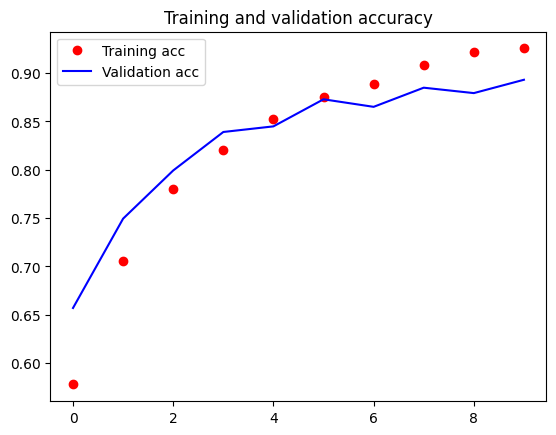

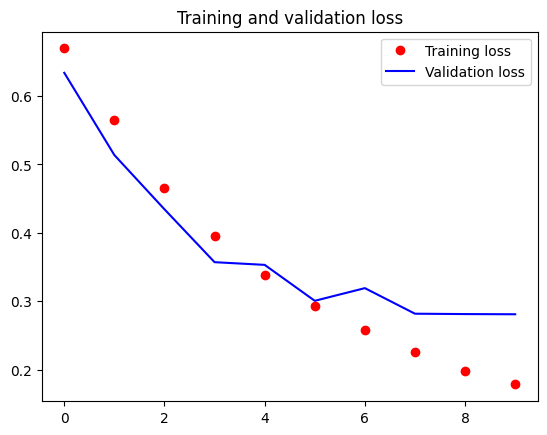

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
import os


c:\AI_practice\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


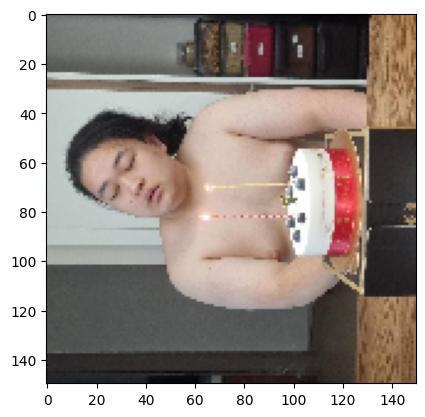

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
prediction:  0.13
It's cat!


In [ ]:

img_path = "./data/y.jpg"
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img).astype(float) / 255
img_batch = np.expand_dims(img_array, axis=0)

model = models.load_model('./dogs-vs-cats.keras')
prediction = model.predict(img_batch)
prediction = prediction.flatten()

print("prediction:  %.2f" % prediction[0])

if prediction[0] < 0.5:
    print("It's cat!")
else:
    print("It's dog!")